In [1]:
import pandas as pd
from IPython.display import display, clear_output
import os

os.getcwd()

'd:\\data_analysis_lab\\ML_100'

In [2]:
m_store = pd.read_csv("d:\\data_analysis_lab\\ML_100\\data\\m_store.csv")
m_area = pd.read_csv("d:\\data_analysis_lab\\ML_100\\data\\m_area.csv")
order_data = pd.read_csv("d:\\data_analysis_lab\\ML_100\\data\\tbl_order_202104.csv")
order_data = pd.merge(order_data, m_store, on="store_id", how="left")
order_data = pd.merge(order_data, m_area, on="area_cd", how="left")
print(order_data.head())

   order_id  store_id customer_id  coupon_cd  sales_detail_id  \
0  34104383        11   C65806632         57         61573513   
1  70652318        59   C09760173         37         54068709   
2  71640388       195   C61227084         17         93678366   
3  75673365       127   C64119972         17          5287952   
4   9077529       174   C10231192         18         18248867   

  order_accept_date    delivered_date  takeout_flag  total_amount  status  \
0  2021-04-01 11:00  2021-04-01 11:39             1         28270       1   
1  2021-04-01 11:00  2021-04-01 11:34             0         28270       2   
2  2021-04-01 11:00  2021-04-01 11:54             0         26470       9   
3  2021-04-01 11:00  2021-04-01 11:17             0         23080       2   
4  2021-04-01 11:00  2021-04-01 11:35             0         46920       2   

  store_name area_cd wide_area narrow_area  
0       자양로점      SL        서울          서울  
1     가마산로2점      SL        서울          서울  
2       화중로

In [3]:
# 마스터에 없는 코드에 대응한 문자열 설정
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = "delivery"
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'takeout'

order_data.loc[order_data['status'] == 0, 'status_name'] = '주문접수'
order_data.loc[order_data['status'] == 1, 'status_name'] = '결제완료'
order_data.loc[order_data['status'] == 2, 'status_name'] = '배달완료'
order_data.loc[order_data['status'] == 3, 'status_name'] = '주문취소'
print(order_data.head())

   order_id  store_id customer_id  coupon_cd  sales_detail_id  \
0  34104383        11   C65806632         57         61573513   
1  70652318        59   C09760173         37         54068709   
2  71640388       195   C61227084         17         93678366   
3  75673365       127   C64119972         17          5287952   
4   9077529       174   C10231192         18         18248867   

  order_accept_date    delivered_date  takeout_flag  total_amount  status  \
0  2021-04-01 11:00  2021-04-01 11:39             1         28270       1   
1  2021-04-01 11:00  2021-04-01 11:34             0         28270       2   
2  2021-04-01 11:00  2021-04-01 11:54             0         26470       9   
3  2021-04-01 11:00  2021-04-01 11:17             0         23080       2   
4  2021-04-01 11:00  2021-04-01 11:35             0         46920       2   

  store_name area_cd wide_area narrow_area takeout_name status_name  
0       자양로점      SL        서울          서울      takeout        결제완료  
1     

In [4]:
from ipywidgets import Dropdown

In [5]:

def order_by_store(val) :
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1,2]))]
    
    display(pick_data.head())

In [6]:
# 드롭다운 메뉴의 선택지로 사용될 매장 이름 목록생성
store_list = m_store['store_name'].to_list()

dropdown = Dropdown(options=store_list, description='지역선택 : ')
# observe : 드롭다운 값이 변경될 때 마다 order_by_store 함수 자동 실행
dropdown.observe(order_by_store, names="value")
display(dropdown)

Dropdown(description='지역선택 : ', index=16, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점'…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
828,32897312,17,C47513492,45,60567914,2021-04-01 12:07,2021-04-01 12:34,0,35300,2,관악로점,SL,서울,서울,delivery,배달완료
1027,14140585,17,C46017369,79,64548564,2021-04-01 12:25,2021-04-01 13:05,1,23080,1,관악로점,SL,서울,서울,takeout,결제완료
1728,16683193,17,C29578786,46,71990607,2021-04-01 13:26,2021-04-01 14:23,0,33190,2,관악로점,SL,서울,서울,delivery,배달완료
2093,8870956,17,C40798351,2,59773780,2021-04-01 13:58,2021-04-01 14:31,1,9390,1,관악로점,SL,서울,서울,takeout,결제완료
2096,40263710,17,C59324905,6,60338184,2021-04-01 13:58,2021-04-01 14:55,0,28080,2,관악로점,SL,서울,서울,delivery,배달완료


In [7]:
import matplotlib.pyplot as plt
import os

In [8]:
#한글 폰트 처리 
if os.name == 'nt' :  # windows
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix' : # macos
    plt.rc('font', family = 'AllieGothic')

In [9]:
plt.rc('axes', unicode_minus=False)

In [ ]:

def graph_by_store(val):
    clear_output() # 이전 출력 내용 지우기
    display(dropdown) # 윗젯 보여주기
    # order_data.loc 열 기준으로 new이고 상태가 1,2 것만 행으로 표기
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1,2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    # datatime으로 변환
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    # 시간의 기준(일)으로 데이터를 재구성함
    temp.resample('D').sum().plot()
    display(pick_data.head())

Dropdown(description='지역선택 : ', index=17, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점'…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
235,30748589,15,C88402470,84,65618219,2021-04-01 11:17,2021-04-01 11:44,0,37420,2,학동로점,SL,서울,서울,delivery,배달완료
493,540615,15,C20818842,13,38794183,2021-04-01 11:37,2021-04-01 12:25,1,23880,1,학동로점,SL,서울,서울,takeout,결제완료
883,12373571,15,C77695703,31,40081113,2021-04-01 12:12,2021-04-01 13:10,0,28770,2,학동로점,SL,서울,서울,delivery,배달완료
1454,79192411,15,C55849789,43,5612619,2021-04-01 13:04,2021-04-01 13:58,1,19270,1,학동로점,SL,서울,서울,takeout,결제완료
1638,39802975,15,C33086892,19,13127741,2021-04-01 13:19,2021-04-01 13:47,0,29870,2,학동로점,SL,서울,서울,delivery,배달완료


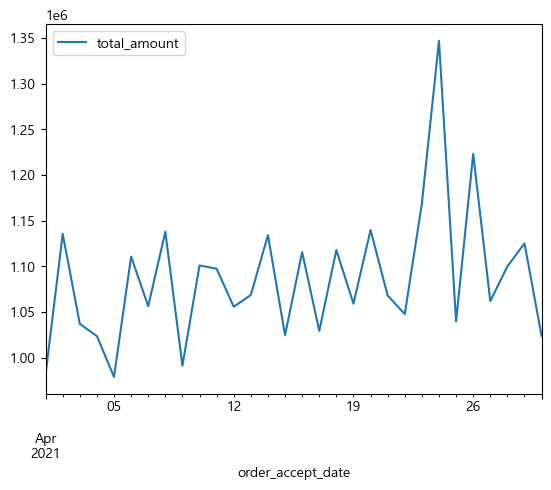

In [18]:
dropdown2 = Dropdown(options = store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

In [25]:
from ipywidgets import SelectMultiple

def order_by_multi(val) :
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new'])) & (order_data['status'].isin([1,2]))]
    display(pick_data.head())
    

In [ ]:
# 여러매장 상세 표시
select = SelectMultiple(options=store_list)
select.observe(order_by_multi, names='value')

display(select)

SelectMultiple(index=(2,), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
348,86786966,3,C53542553,30,41286765,2021-04-01 11:26,2021-04-01 12:02,0,19000,2,무교로점,SL,서울,서울,delivery,배달완료
449,96550218,3,C75719805,85,34901884,2021-04-01 11:33,2021-04-01 12:05,0,29870,2,무교로점,SL,서울,서울,delivery,배달완료
777,70396651,3,C91220594,49,68701272,2021-04-01 12:02,2021-04-01 12:31,0,9390,2,무교로점,SL,서울,서울,delivery,배달완료
1742,61006877,3,C99637930,42,96913554,2021-04-01 13:29,2021-04-01 13:46,0,19270,2,무교로점,SL,서울,서울,delivery,배달완료
2079,70079672,3,C82802183,59,33211006,2021-04-01 13:58,2021-04-01 14:24,1,18820,1,무교로점,SL,서울,서울,takeout,결제완료


In [ ]:
def gragh_by_multi(val) :
    clear_output()
    display(select2)
    
    fig = plt.figure(figsize=(17,4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    
    i = 0
    for trg in val['new'] :
        pick_data = order_data[
            (order_data['store_name'] == trg) & 
            (order_data['status'].isin([1,2]))
            ]
        temp = pick_data[['order_accept_date', 'total_amount', 'store_name']].copy()
        temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace=True)
        i += 1
        # 여러개의 작은 그래프 영역을 만들기 위함
        # add_subplot(nrows, ncols, index) 
        # nrows : 전체 행수, ncols : 전체 열의 수, index : 몇 번째 subplot
        ax = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum().index, 
                temp.resample('D').sum()['total_amount'])
        ax.set_title(trg)
    

SelectMultiple(description='매장 선택 : ', index=(1, 3, 13, 22), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로…

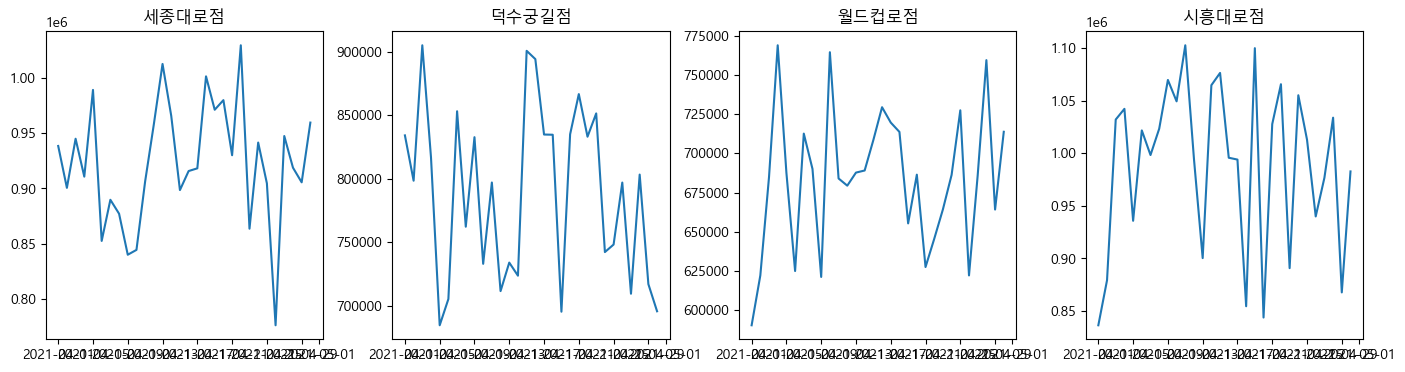

In [38]:
select2 = SelectMultiple(options=store_list, description = '매장 선택 : ')
select2.observe(gragh_by_multi, names='value')
display(select2)

In [61]:
from ipywidgets import IntSlider

def store_lower(val) : 
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    size_data = temp.size()
    print(val)
    print(size_data[size_data < val['new']])


In [ ]:
    
slider = IntSlider(value=1100, min=1000, max=2000, step=100, description='건수 : ',)
slider.observe(store_lower, names="value")
display(slider)

IntSlider(value=1200, description='건수 : ', max=2000, min=1000, step=100)

In [67]:
def store_upper(val):
    clear_output()
    display(slider2)
    temp = order_data.groupby('store_name')
    temp_size = temp.size()
    print(temp_size[temp_size >= val['new']])


In [ ]:

slider2 = IntSlider(value=1600, min=1000, max=2000, step=100, description='건수 :',)
slider2.observe(store_upper, names="value")
display(slider2)

IntSlider(value=1800, description='건수 :', max=2000, min=1000, step=100)

In [69]:
area_list = m_area['wide_area'].unique()

def order_by_area(val) :
    clear_output()
    display(toggle)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new'] &
                                order_data['status'].isin([1,2]))]
    display(pick_data.head())

In [ ]:
from ipywidgets import ToggleButtons

toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names="value")
display(toggle)

ToggleButtons(index=2, options=('서울', '부산', '대전', '광주', '세종', '경기'), value='대전')

TypeError: Cannot perform 'rand_' with a dtyped [bool] array and scalar of type [bool]